In [5]:
#Sometimes values are outside of the image, so we correct them
def in_margins(x: int, margin: int) -> int:
    if x < 0:
        return 0
    if x > margin:
        return margin
    return x

In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt

class CustomDataset:
    def __init__(self, images_dir, labels_dir, output_images_dir, output_labels_dir):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.output_images_dir = output_images_dir
        self.output_labels_dir = output_labels_dir
        
        # Ensure output directories exist
        os.makedirs(output_images_dir, exist_ok=True)
        os.makedirs(output_labels_dir, exist_ok=True)
        
        # Generate images and labels
        self.generate_images_and_labels()

    def generate_images_and_labels(self):
        image_files = os.listdir(self.images_dir)
        for img_name in image_files:
            # Load image
            image_path = os.path.join(self.images_dir, img_name)
            image = Image.open(image_path)
            
            # Load labels from corresponding file
            label_path = os.path.join(self.labels_dir, img_name.replace('.jpg', '.txt'))
            with open(label_path, 'r') as file:
                lines = file.readlines()

            for i, line in enumerate(lines):
                # Parse label information
                parts = line.split()
                class_label = parts[0]
                x_center = int(float(parts[1]) * image.width)
                y_center = int(float(parts[2]) * image.height)
                width = int(float(parts[3]) * image.width)
                height = int(float(parts[4]) * image.height)
                
                # Calculate bounding box coordinates
                x1 = max(0, x_center - width // 2)
                y1 = max(0, y_center - height // 2)
                x2 = min(image.width, x_center + width // 2)
                y2 = min(image.height, y_center + height // 2)
                
                # Check if cropped image dimensions are valid
                if x1 < x2 and y1 < y2:
                    # Crop and save the image
                    cropped_image = image.crop((x1, y1, x2, y2))
                    cropped_img_name = f"{os.path.splitext(img_name)[0]}_{i}.jpg"
                    cropped_image.save(os.path.join(self.output_images_dir, cropped_img_name))
                    
                    # Save label information to txt file
                    label_txt_name = f"{os.path.splitext(img_name)[0]}_{i}.txt"
                    label_txt_path = os.path.join(self.output_labels_dir, label_txt_name)
                    with open(label_txt_path, 'w') as label_file:
                        label_file.write(f"{class_label} {x1} {y1} {x2} {y2}\n")
                else:
                    print(f"Warning: Empty image detected for {img_name}, skipping...")
                    

# Example usage
images_dir = 'synthetic_dataset/images'
labels_dir = 'synthetic_dataset/labels'
output_images_dir = 'crop_dataset/images'
output_labels_dir = 'crop_dataset/labels'

dataset = CustomDataset(images_dir, labels_dir, output_images_dir, output_labels_dir)



In [9]:
#dataset = CustomDataset(images_dir, labels_dir, output_images_dir, output_labels_dir)

print(len(os.listdir('crop_dataset/images')))
print(len(os.listdir('crop_dataset/labels')))

53157
53157


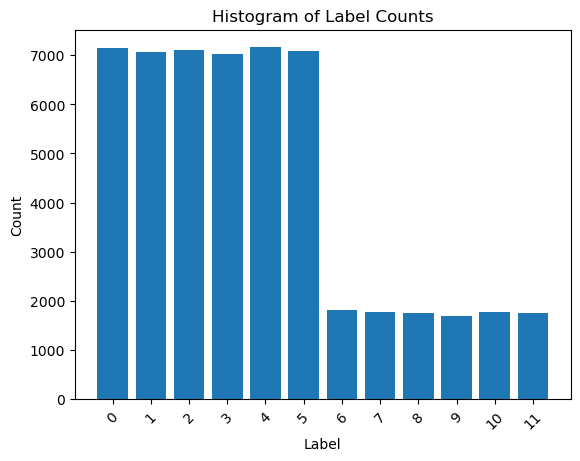

In [23]:
import os
import matplotlib.pyplot as plt

# Define the directory containing the label files
labels_dir = 'crop_dataset/labels'

# Initialize a dictionary to store label counts with all possible labels
all_labels = [str(i) for i in range(12)]  # Assuming labels are numbers from 0 to 11
label_counts = {label: 0 for label in all_labels}

# Iterate over all text files in the labels folder
for label_file in os.listdir(labels_dir):
    # Read the contents of the label file
    label_file_path = os.path.join(labels_dir, label_file)
    with open(label_file_path, 'r') as file:
        label = file.readlines(0)
        label = label[0].split()
        label_counts[label[0]] = label_counts[label[0]] + 1

# Plot the histogram of label counts
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Histogram of Label Counts')
plt.xticks(rotation=45)

# Set y-axis limits to start from zero
plt.ylim(0)

plt.show()



In [32]:
print((label_counts.values()), sep="\n")
for key, value in zip(label_counts.keys(), label_counts.values()):
    print(key, value)

dict_values([7137, 7072, 7099, 7023, 7161, 7086, 1816, 1783, 1748, 1697, 1783, 1752])
0 7137
1 7072
2 7099
3 7023
4 7161
5 7086
6 1816
7 1783
8 1748
9 1697
10 1783
11 1752
